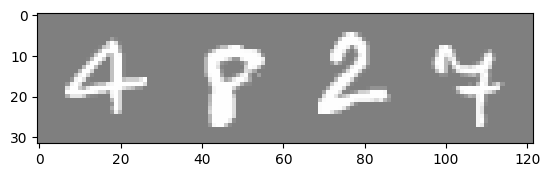

Epoch [1/5], Step [2000/15000], Loss: 2.3010
Epoch [1/5], Step [4000/15000], Loss: 2.2855
Epoch [1/5], Step [6000/15000], Loss: 2.3036
Epoch [1/5], Step [8000/15000], Loss: 1.9794
Epoch [1/5], Step [10000/15000], Loss: 0.9184
Epoch [1/5], Step [12000/15000], Loss: 0.8566
Epoch [1/5], Step [14000/15000], Loss: 0.1033
Epoch [2/5], Step [2000/15000], Loss: 0.3854
Epoch [2/5], Step [4000/15000], Loss: 0.0592
Epoch [2/5], Step [6000/15000], Loss: 0.3068
Epoch [2/5], Step [8000/15000], Loss: 0.2541
Epoch [2/5], Step [10000/15000], Loss: 0.0117
Epoch [2/5], Step [12000/15000], Loss: 0.1187
Epoch [2/5], Step [14000/15000], Loss: 0.0621
Epoch [3/5], Step [2000/15000], Loss: 0.0160
Epoch [3/5], Step [4000/15000], Loss: 0.0167
Epoch [3/5], Step [6000/15000], Loss: 0.2183
Epoch [3/5], Step [8000/15000], Loss: 0.0366
Epoch [3/5], Step [10000/15000], Loss: 0.0290
Epoch [3/5], Step [12000/15000], Loss: 0.2059
Epoch [3/5], Step [14000/15000], Loss: 0.0064
Epoch [4/5], Step [2000/15000], Loss: 0.0179
E

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

classes = ('1','2','3','4','5','6','7','8','9','10')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
images.size()

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet,self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 4 * 4 , 120)
        self.fc2 = nn. Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        # batch size, 1,28,28
        x = self.pool(F.relu(self.conv1(x))) # b.s., 6,12,12
        x = self.pool(F.relu(self.conv2(x))) # b.s,16,4,4
        x = x.view(-1, 16 * 4 * 4) # b.s,256
        x = F.relu(self.fc1(x)) #bs,120
        x = F.relu(self.fc2(x)) #bs,84
        x = self.fc3(x) #bs,10
        return x
        


        
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)   


n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 1, 28, 28] = 4, 1, 784
        # input_layer: 1 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %') 
    


        




